<a href="https://colab.research.google.com/github/Demon-God-King/GoogleColab/blob/main/Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [1]:
import yfinance as yf

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score

import pandas as pd


### Downloading S&P 500 Price Data

In [2]:
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")

### Exploring S&P 500 Price Data

In [3]:
sp500.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,0.0,0.0
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,0.0,0.0
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,0.0,0.0
2023-07-20 00:00:00-04:00,4554.379883,4564.740234,4527.560059,4534.870117,3761770000,0.0,0.0
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,0.0,0.0


In [4]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-07-10 00:00:00-04:00', '2023-07-11 00:00:00-04:00',
               '2023-07-12 00:00:00-04:00', '2023-07-13 00:00:00-04:00',
               '2023-07-14 00:00:00-04:00', '2023-07-17 00:00:00-04:00',
               '2023-07-18 00:00:00-04:00', '2023-07-19 00:00:00-04:00',
               '2023-07-20 00:00:00-04:00', '2023-07-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24003, freq=None)

### Cleaning and Visualizing Data

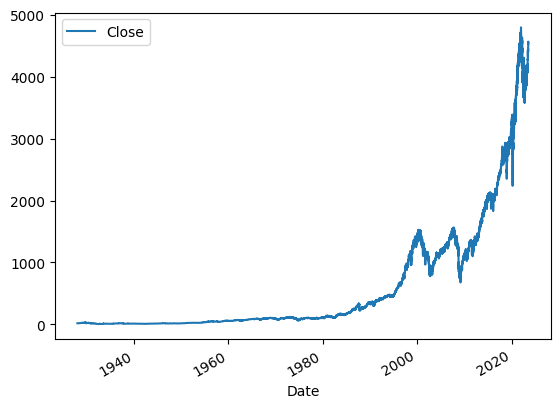

In [5]:
sp500.plot.line(y="Close",use_index=True);

In [6]:
del sp500["Dividends"]
del sp500["Stock Splits"]

### Setting up target for ML

In [7]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [8]:
sp500.tail(5)

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,4534.870117
2023-07-20 00:00:00-04:00,4554.379883,4564.740234,4527.560059,4534.870117,3761770000,4536.339844
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,NaN


In [9]:
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [10]:
sp500.tail(5)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2023-07-17 00:00:00-04:00,4508.859863,4532.850098,4504.899902,4522.790039,3538240000,4554.979980,1
2023-07-18 00:00:00-04:00,4521.779785,4562.299805,4514.589844,4554.979980,4090010000,4565.720215,1
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,4534.870117,0
2023-07-20 00:00:00-04:00,4554.379883,4564.740234,4527.560059,4534.870117,3761770000,4536.339844,1
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,NaN,0


In [11]:
sp500=sp500.loc["1990-01-01":].copy()

In [12]:
sp500.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
1990-01-09 00:00:00-05:00,353.829987,354.170013,349.609985,349.619995,155210000,347.309998,0
1990-01-10 00:00:00-05:00,349.619995,349.619995,344.320007,347.309998,175990000,348.529999,1
1990-01-11 00:00:00-05:00,347.309998,350.140015,347.309998,348.529999,154390000,339.929993,0
1990-01-12 00:00:00-05:00,348.529999,348.529999,339.489990,339.929993,183880000,337.000000,0


### Training ML Model

In [14]:
model = RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=42)

train = sp500.iloc[:-100]

test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]

model.fit(train[predictors],train["Target"]);

In [15]:
pred = model.predict(test[predictors])


pred = pd.Series(pred,index=test.index)

In [16]:
precision_score(test["Target"],pred)

0.6346153846153846

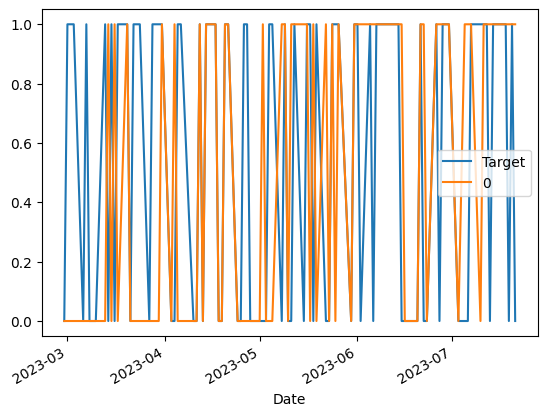

In [25]:
combined = pd.concat([test["Target"],pred],axis=1)

combined.tail(100).plot();

### BackTesting System

In [18]:
def predict(train,test,predictors,model):
    model.fit(train[predictors],train['Target'] )
    pred = model.predict(test[predictors])
    pred = pd.Series(pred, index=test.index, name ="Predictions")
    combined = pd.concat([test["Target"],pred],axis=1)
    return combined

In [19]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [20]:
predictions = backtest(sp500,model,predictors)

In [21]:
predictions["Predictions"].value_counts()

0    3312
1    2641
Name: Predictions, dtype: int64

In [23]:
precision_score(predictions["Target"],predictions["Predictions"])

0.5327527451722832

In [24]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534184
0    0.465816
Name: Target, dtype: float64

###Adding new predictors

In [26]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [27]:
sp500 = sp500.dropna(subset=sp500.columns[sp500.columns != "Tomorrow"])

In [30]:
sp500.tail(3)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2023-07-19 00:00:00-04:00,4563.870117,4578.430176,4557.479980,4565.720215,4115670000,4534.870117,0,1.001178,2.0,1.007487,4.0,1.067044,34.0,1.130431,121.0,1.198702,534.0
2023-07-20 00:00:00-04:00,4554.379883,4564.740234,4527.560059,4534.870117,3761770000,4536.339844,1,0.996610,1.0,0.999584,3.0,1.058194,33.0,1.122197,120.0,1.190127,534.0
2023-07-21 00:00:00-04:00,4550.160156,4555.000000,4535.790039,4536.339844,3570190000,NaN,0,1.000162,1.0,0.998547,4.0,1.056627,34.0,1.121922,121.0,1.190026,535.0


###Improving the Model

In [31]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [32]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [33]:
predictions = backtest(sp500, model, new_predictors)

In [34]:
predictions["Predictions"].value_counts()

0.0    4136
1.0     817
Name: Predictions, dtype: int64

In [35]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5691554467564259

In [36]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.544115
0    0.455885
Name: Target, dtype: float64

In [37]:
predictions.tail(5)

,Target,Predictions
Date,,
2023-07-17 00:00:00-04:00,1,0.0
2023-07-18 00:00:00-04:00,1,0.0
2023-07-19 00:00:00-04:00,0,0.0
2023-07-20 00:00:00-04:00,1,0.0
2023-07-21 00:00:00-04:00,0,0.0
